In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import gc

rc={'axes.labelsize': 15.0,
    'font.size': 15.0, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15.0,
    'xtick.labelsize': 15.0,
    'ytick.labelsize': 15.0}
plt.rcParams.update(**rc)

## model comparison

In [2]:
#fn_ls = glob("./data/*.csv")
df_ls = []
for fn in ["AutoML","LR","RF","XGB"]:
    df_tmp = pd.read_csv("./data/"+fn+".csv")
    #df_tmp["model"] = fn.split(".")[-2].split("/")[-1]
    df_tmp["model"] = fn
    df_ls.append(df_tmp.copy())
    del df_tmp
    gc.collect()
    
df = pd.concat(df_ls,axis=0)
del df_ls
gc.collect()

0

## feature importance of gas

In [3]:
y = df[df["Gas"]=="Y"][["SpatialScale","TimeScale","model","R2"]].copy().rename(columns={"R2":"R2_Y"})
n = df[df["Gas"]=="N"][["SpatialScale","TimeScale","model","R2"]].copy().rename(columns={"R2":"R2_N"})

In [4]:
diff = y.merge(n, on=["SpatialScale","TimeScale","model"],how="inner")
diff["R2"] = diff["R2_Y"] - diff["R2_N"]

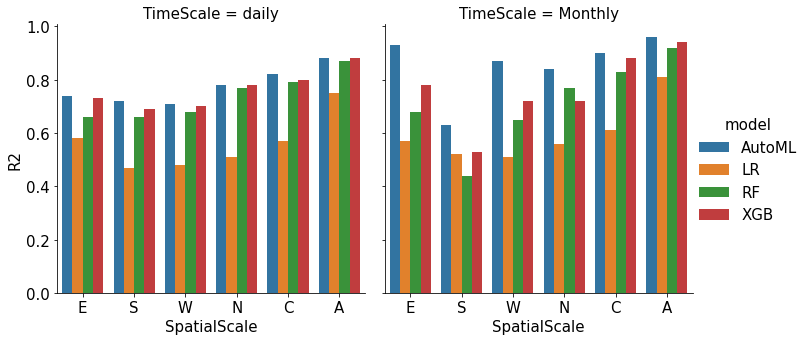

In [5]:
ax = sns.catplot(x="SpatialScale",y="R2",
                 hue="model", order=["E","S","W","N","C","A"],
                 col="TimeScale",
                 data=df[(df["TimeScale"]!="Monthly_D")&(df["Gas"]=="Y")], kind="bar")
plt.savefig("../figures/fig7_a.pdf")
plt.show()

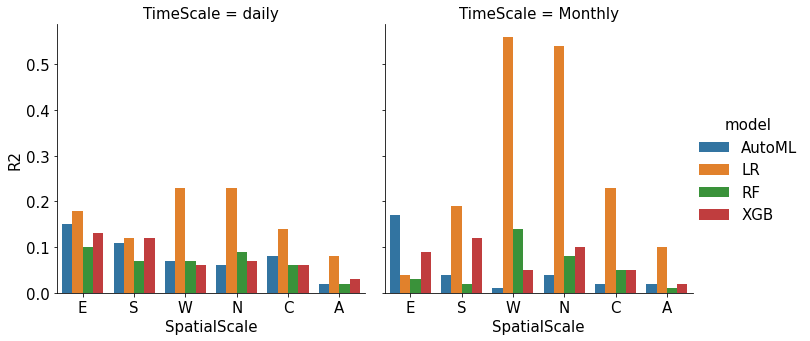

In [6]:
ax = sns.catplot(x="SpatialScale",y="R2",
                 hue="model", order=["E","S","W","N","C","A"],
                 col="TimeScale",
                 data=diff[diff["TimeScale"]!="Monthly_D"], kind="bar")
plt.savefig("../figures/fig7_b.pdf")
plt.show()